In [86]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [87]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [88]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [89]:
!pip install scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Loading the Dataset

In [91]:
bottles= pd.read_csv('bottle.csv')
bottles.head()

/var/folders/bp/jq7zk5gx47qcjwt929wnb04c0000gn/T/ipykernel_89672/851278595.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottles= pd.read_csv('bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop all null columns or empty

In [92]:
bottles.dropna(axis=1, how='all', inplace=True)

In [93]:
# Filter rows with missing values in the columns of interest
# This step is necessary to remove any rows that have missing values in the columns we are interested in. 
# Missing values can affect the accuracy of our model.

In [94]:
print(bottles.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [95]:
bottles = bottles[['T_degC', 'Salnty', 'O2ml_L', 'SiO3uM', 'PO4uM']].dropna() 

 Split the data into features (X) and target (y)
 We separate the target variable (temperature) from the features (other oceanographic parameters)  to prepare the data for model training and evaluation.

In [96]:
X = bottles.drop(columns=['T_degC'])
y = bottles['T_degC']



In [97]:
#Normalise the data to scale it to a range between 0 and 1 which 
# improves the performance of the algorithm

In [98]:
scaler = MinMaxScaler()
y_normalised = scaler.fit_transform(y.reshape(-1, 1))


AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
# Standardize the target variable
# Standardization scales the data to have a mean of 0 and a standard deviation of 1, making it easier to compare features with different units.
scaler_standard = StandardScaler()
y_standardized = scaler_standard.fit_transform(y.reshape(-1, 1))

In [ ]:
#Function to perform linear regression
def perform_linear_regression(X, y, scaler_type):
    # Split the data into training and testing sets
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    
    y_pred = model.predict(X_test)

    # Evaluate the model
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'{scaler_type} - R^2: {r2}')
    print(f'{scaler_type} - MSE: {mse}')
    print(f'{scaler_type} - RMSE: {rmse}')

     # Plot the results
    # Visualizing the actual vs. predicted values helps us understand the model's performance.
    plt.scatter(y_test, y_pred, color='blue', label='Predicted')
    plt.xlabel(f'{scaler_type} Actual Temperature (°C)')
    plt.ylabel(f'{scaler_type} Predicted Temperature (°C)')
    plt.title(f'Actual vs Predicted Temperature ({scaler_type})')
    plt.legend()
    plt.show()

    return model, mse, r2

Carry out linear regression of the normalised data and get r^2, mse and rmse

Normalized - R^2: 0.8927805756749543
Normalized - MSE: 0.001976468223067369
Normalized - RMSE: 0.044457487817772263


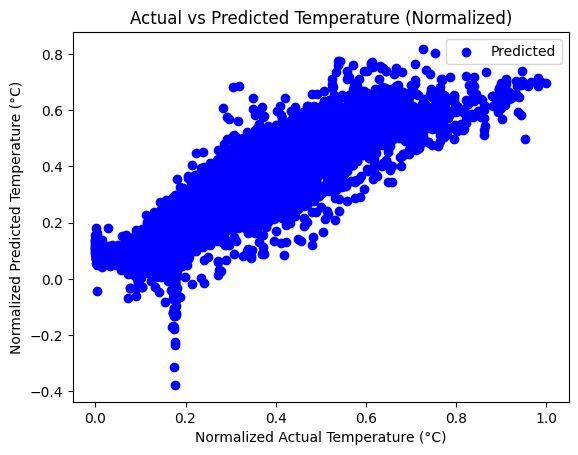

In [ ]:
model_normalized, mse_normalized, r2_normalized = perform_linear_regression(X, y_normalised, 'Normalized')

Carry out linear regression of the standardised data and get r^2, mse and rmse

Standardized - R^2: 0.8927805756749543
Standardized - MSE: 0.10703501637132236
Standardized - RMSE: 0.3271620643829635


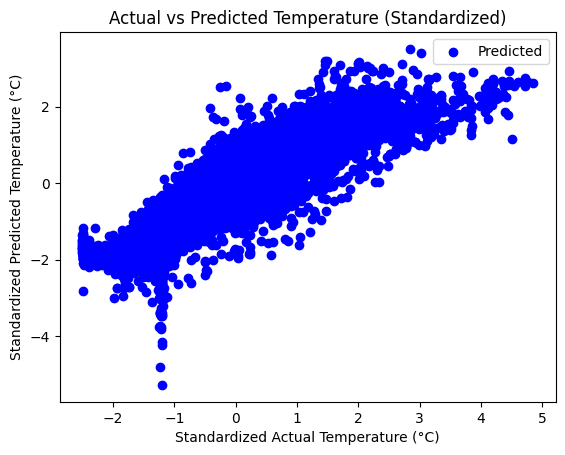

In [ ]:
model_standardized, mse_standardized, r2_standardized = perform_linear_regression(X, y_standardized, 'Standardized')

Compare the MSE for normalised vs standardised data and plot the diference. This helps us understand the performance of the model 

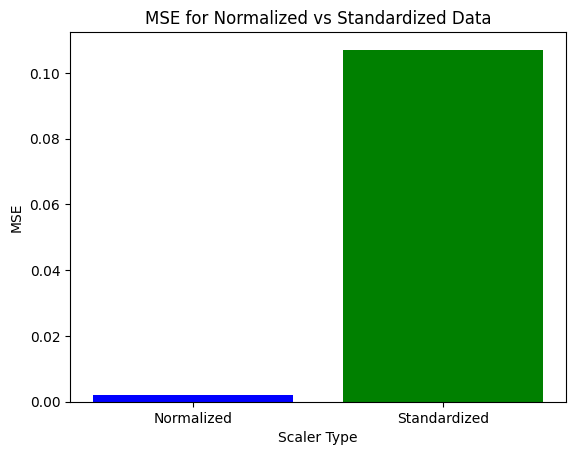

In [ ]:
mse_values = [mse_normalized, mse_standardized]
scaler_types = ['Normalized', 'Standardized']
plt.bar(scaler_types, mse_values, color=['blue', 'green'])
plt.xlabel('Scaler Type')
plt.ylabel('MSE')
plt.title('MSE for Normalized vs Standardized Data')
plt.show()

In [ ]:
# Feature Selection using RFE
# Recursive Feature Elimination (RFE) helps in selecting
#  the most significant features by recursively considering smaller sets of features.
selector = RFE(model_normalized, n_features_to_select=2)
selector = selector.fit(X, y_normalised.ravel())
ranking = selector.ranking_
print("Feature Ranking (Normalized):", ranking)

Feature Ranking (Normalized): [1 2 3 1]


Identify the selected features and only use those to perform linear regression. Refit the model and perform lienar regression


Selected Features (Normalized): Index(['Salnty', 'PO4uM'], dtype='object')
Normalized with Selected Features - R^2: 0.870010022038977
Normalized with Selected Features - MSE: 0.002396217498597167
Normalized with Selected Features - RMSE: 0.048951174639605605


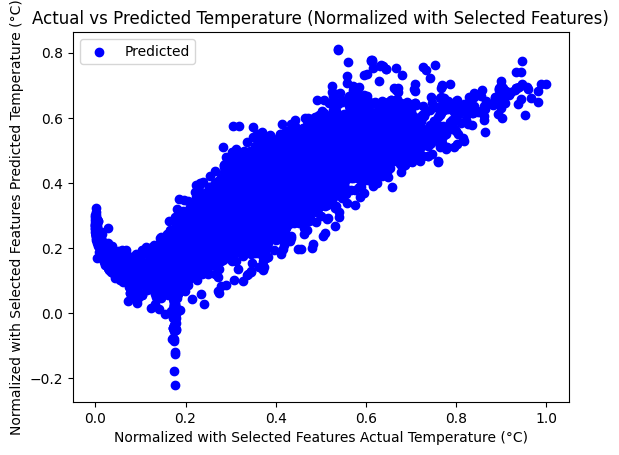

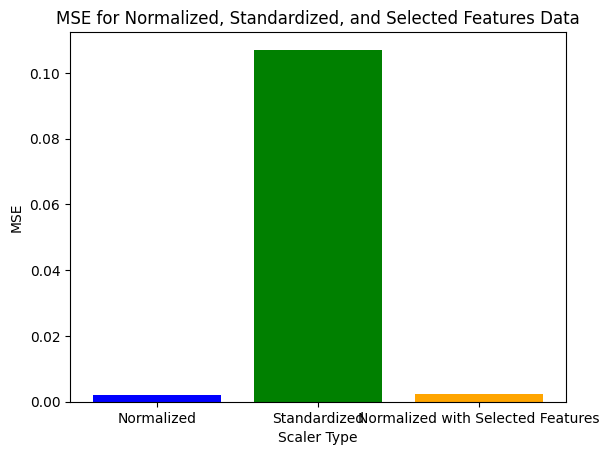

In [ ]:
selected_features = X.columns[selector.support_]
print("Selected Features (Normalized):", selected_features)


X_selected = X[selected_features]


model_selected, mse_selected, r2_selected = perform_linear_regression(X_selected, y_normalised, 'Normalized with Selected Features')


mse_values.append(mse_selected)
scaler_types.append('Normalized with Selected Features')

plt.bar(scaler_types, mse_values, color=['blue', 'green', 'orange'])
plt.xlabel('Scaler Type')
plt.ylabel('MSE')
plt.title('MSE for Normalized, Standardized, and Selected Features Data')
plt.show()

In [ ]:
def gradient_descent(X, y, learning_rate=0.001, iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 2/m * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost = (1/m) * np.sum(errors**2)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
# Prepare the data for gradient descent (normalized)
# Adding a bias term and flattening the array prepares the data for gradient descent.
X_b_normalized = np.c_[np.ones((len(X), 1)), X]  # Add bias term
y_train_array_normalized = y_normalised.flatten()  

Run the gradient descent function 

In [ ]:
theta_normalized, cost_history_normalized = gradient_descent(X_b_normalized, y_train_array_normalized)

/var/folders/bp/jq7zk5gx47qcjwt929wnb04c0000gn/T/ipykernel_89672/2591731281.py:11: RuntimeWarning: overflow encountered in square
  cost = (1/m) * np.sum(errors**2)


PLot the cost history of the normalised data

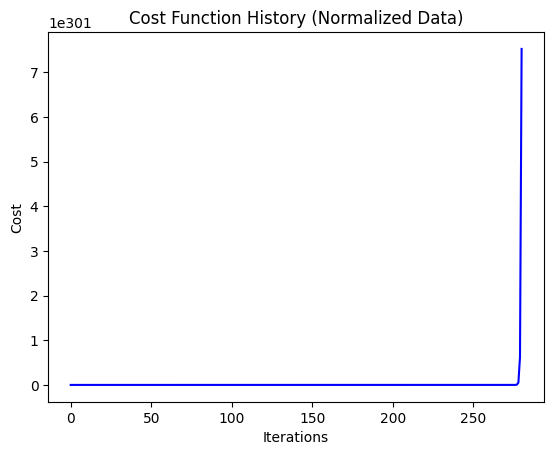

In [ ]:
plt.plot(range(len(cost_history_normalized)), cost_history_normalized, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History (Normalized Data)')
plt.show()


In [ ]:
X_b_standardized = np.c_[np.ones((len(X), 1)), X]  # Add bias term
y_train_array_standardized = y_standardized.flatten()  # Flatten the array for gradient descent

In [ ]:
theta_standardized, cost_history_standardized = gradient_descent(X_b_standardized, y_train_array_standardized)

/var/folders/bp/jq7zk5gx47qcjwt929wnb04c0000gn/T/ipykernel_89672/1807550210.py:11: RuntimeWarning: overflow encountered in square
  cost = (1/m) * np.sum(errors**2)


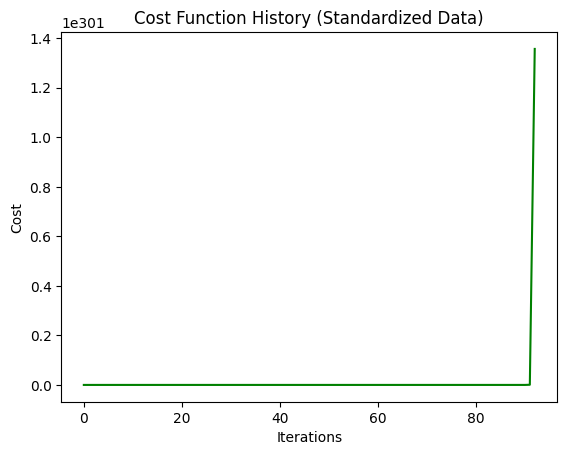

In [ ]:
plt.plot(range(len(cost_history_standardized)), cost_history_standardized, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History (Standardized Data)')
plt.show()

Logistic regression / Classification 

1) convert temperatures to be above or below the median value so that we have it in binary form 

In [99]:
median_temp = y.median()
y_binary = (y > median_temp).astype(int)  # 1 if above median, 0 if below or equal to median

# Normalize and standardize the features
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

Normalized - Accuracy: 0.9590708769071895
Normalized - Confusion Matrix:
[[33059  1231]
 [ 1583 32880]]
Normalized - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     34290
           1       0.96      0.95      0.96     34463

    accuracy                           0.96     68753
   macro avg       0.96      0.96      0.96     68753
weighted avg       0.96      0.96      0.96     68753



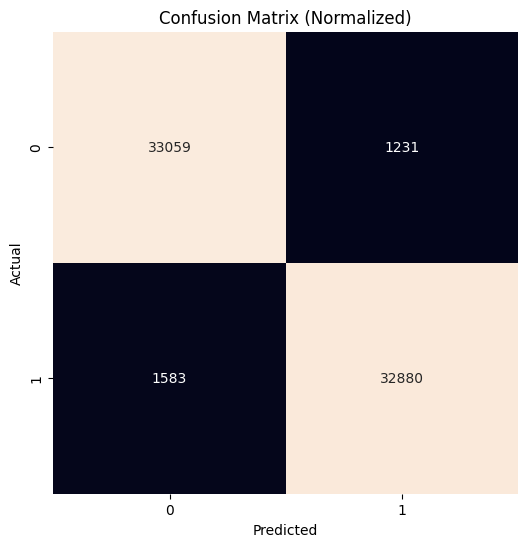

Standardized - Accuracy: 0.9613835032653121
Standardized - Confusion Matrix:
[[33070  1220]
 [ 1435 33028]]
Standardized - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     34290
           1       0.96      0.96      0.96     34463

    accuracy                           0.96     68753
   macro avg       0.96      0.96      0.96     68753
weighted avg       0.96      0.96      0.96     68753



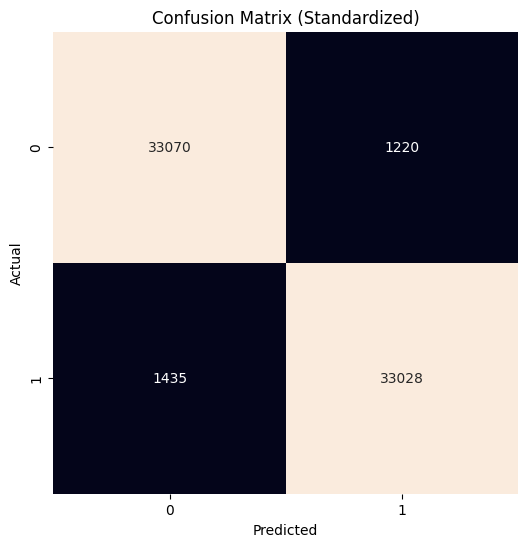

In [104]:
#perform the logistic regression
def perform_logistic_regression(X, y, scaler_type):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'{scaler_type} - Accuracy: {accuracy}')
    print(f'{scaler_type} - Confusion Matrix:\n{cm}')
    print(f'{scaler_type} - Classification Report:\n{report}')

    # confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d',cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({scaler_type})')
    plt.show()

    return model, accuracy

# Perform logistic regression with normalized data
model_logistic_normalized, accuracy_normalized = perform_logistic_regression(X_normalized, y_binary, 'Normalized')

# Perform logistic regression with standardized data
model_logistic_standardized, accuracy_standardized = perform_logistic_regression(X_standardized, y_binary, 'Standardized')

The logistic regression model with standardized data achieved higher accuracy compared to the model with normalized data, demonstrating that standardization was more effective in predicting whether the temperature is above or below the median value. This highlights the importance of choosing the appropriate feature scaling method to optimize the performance of machine learning models.






